### Time series analyses IIb (2014)
Testing for Granger causality.

**References**: 
- https://stats.stackexchange.com/questions/160278/testing-for-granger-causality
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html
- https://www.machinelearningplus.com/time-series/time-series-analysis-python/
- https://www.int-res.com/abstracts/meps/v318/p187-201/

I'm testing the significance of lags between each of Group A:
1. nsmz (small zooplankton)
2. nmdz (medium zooplankton)
3. nlgz (large zooplankton)

...and Group B: 
1. no3 (nitrate)
2. po4 (phosphate)
3. sio4 (silicate)
4. nsm (small phytoplankton)
5. nlg (large phytoplankton)

The data called here is sourced from the semi-daily output of COBALT. Lags up to 10 (5 days) will be tested between each pair. The data is in 2-D array format. 

#### Import modules

In [2]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import rrule, parser
from statsmodels.tsa.stattools import adfuller
from random import sample 
%matplotlib inline

#### Import CSVs

In [3]:
%cd /home/lindsay/hioekg-compare-years/

nsmz_df_2013=pd.read_csv('nsmz_semidaily_df_2013.csv')
nmdz_df_2013=pd.read_csv('nmdz_semidaily_df_2013.csv')
nlgz_df_2013=pd.read_csv('nlgz_semidaily_df_2013.csv')
nsm_df_2013=pd.read_csv('nsm_semidaily_df_2013.csv')
nlg_df_2013=pd.read_csv('nlg_semidaily_df_2013.csv')
no3_df_2013=pd.read_csv('no3_semidaily_df_2013.csv')
po4_df_2013=pd.read_csv('po4_semidaily_df_2013.csv')
sio4_df_2013=pd.read_csv('sio4_semidaily_df_2013.csv')

nsmz_df_2014=pd.read_csv('nsmz_semidaily_df_2014.csv')
nmdz_df_2014=pd.read_csv('nmdz_semidaily_df_2014.csv')
nlgz_df_2014=pd.read_csv('nlgz_semidaily_df_2014.csv')
nsm_df_2014=pd.read_csv('nsm_semidaily_df_2014.csv')
nlg_df_2014=pd.read_csv('nlg_semidaily_df_2014.csv')
no3_df_2014=pd.read_csv('no3_semidaily_df_2014.csv')
po4_df_2014=pd.read_csv('po4_semidaily_df_2014.csv')
sio4_df_2014=pd.read_csv('sio4_semidaily_df_2014.csv')

/home/lindsay/hioekg-compare-years


#### Prepare the data

To calculate Granger causality between two variables, both timeseries must be stationary.

1. Randomly splitting each df in two and checking the mean and variance- are they in the same ballpark?
2. Randomly sampling 100,000 points from each time series and implementing the Augmented Dickey Fuller (ADF) test to see if it is stationary time series

In [134]:
df = nsmz_df_2014.concentration # changed each time
X = df.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print(mean1/mean2)
print(var1/var2)
# ADF
Y = sample(list(X), 100000)
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

1.0061036447889309
0.8095290668019351
ADF Statistic: -316.562864
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


All series are stationary based on these two tests.

#### Create dfs for each predictor

In [4]:
no32013 = no3_df_2013.concentration
po42013 = po4_df_2013.concentration
sio42013 = sio4_df_2013.concentration
nsm2013 = nsm_df_2013.concentration
nlg2013 = nlg_df_2013.concentration

no32014 = no3_df_2014.concentration
po42014 = po4_df_2014.concentration
sio42014 = sio4_df_2014.concentration
nsm2014 = nsm_df_2014.concentration
nlg2014 = nlg_df_2014.concentration

#### nsmz GC tests: 2013

In [5]:
df = nsmz_df_2013.concentration
no3concat2013 = [no32013,df]
po4concat2013 = [po42013,df]
sio4concat2013 = [sio42013,df]
nsmconcat2013 = [nsm2013,df]
nlgconcat2013 = [nlg2013,df]
no32013 = pd.concat(no3concat2013, axis=1)
po42013 = pd.concat(po4concat2013, axis=1)
sio42013 = pd.concat(sio4concat2013, axis=1)
nsm2013 = pd.concat(nsmconcat2013, axis=1)
nlg2013 = pd.concat(nlgconcat2013, axis=1)
no32013.columns = ['no3','nsmz']
po42013.columns = ['po4','nsmz']
sio42013.columns = ['sio4','nsmz']
nsm2013.columns = ['nsm','nsmz']
nlg2013.columns = ['nlg','nsmz']

In [15]:
gcno3=grangercausalitytests(no32013[['nsmz', 'no3']], maxlag=10)
gcpo4=grangercausalitytests(po42013[['nsmz', 'po4']], maxlag=10)
gcsio4=grangercausalitytests(sio42013[['nsmz', 'sio4']], maxlag=10)
gcnsm=grangercausalitytests(nsm2013[['nsmz', 'nsm']], maxlag=10)
gcnlg=grangercausalitytests(nlg2013[['nsmz', 'nlg']], maxlag=10)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16403.7570, p=0.0000  , df_denom=7254716, df_num=1
ssr based chi2 test:   chi2=16403.7638, p=0.0000  , df=1
likelihood ratio test: chi2=16385.2463, p=0.0000  , df=1
parameter F test:         F=16403.7570, p=0.0000  , df_denom=7254716, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11393.4151, p=0.0000  , df_denom=7254713, df_num=2
ssr based chi2 test:   chi2=22786.8460, p=0.0000  , df=2
likelihood ratio test: chi2=22751.1343, p=0.0000  , df=2
parameter F test:         F=11393.4151, p=0.0000  , df_denom=7254713, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6746.0283, p=0.0000  , df_denom=7254710, df_num=3
ssr based chi2 test:   chi2=20238.1044, p=0.0000  , df=3
likelihood ratio test: chi2=20209.9282, p=0.0000  , df=3
parameter F test:         F=6746.0283, p=0.0000  , df_denom=7254710, df_num=3

Granger Causality
number of lags (no zero) 4


MemoryError: Unable to allocate array with shape (7254716, 9) and data type float64

### nsmz

In [257]:
# Find the mean concentration of each week for each week over a period of 1 year
df=nsmz_df_2013[['date', 'concentration']]
df2=nsmz_df_2014[['date','concentration']]
all_frames = [df,df2]
df = pd.concat(all_frames, axis=0)

In [258]:
# Replace all negative values with NaNs
df=df.assign(concentration = df.concentration.where(df.concentration.ge(0)))

In [263]:
# Group by 7 day increments
df=df.groupby(np.arange(len(df.index))//141064).mean()
df.head()

,concentration
0,1.225938e-07
1,1.138566e-07
2,1.278411e-07
3,1.168336e-07
4,1.191120e-07


In [265]:
# Create list of weekly dates
date1 = '2013-01-02'
date2 = '2014-12-23'
date = list(rrule.rrule(rrule.WEEKLY, dtstart=parser.parse(date1), until=parser.parse(date2)))

In [268]:
# Add list to df
df=df.assign(date=date)

In [269]:
# Classify date col as datetime object
df['date'] = pd.to_datetime(df['date'])

In [270]:
# Prophet requires the datetime col name = ds, the feature var = y
df.columns = ['y', 'ds']

In [271]:
df.tail()

,y,ds
98,1.131755e-07,2014-11-19
99,1.239669e-07,2014-11-26
100,1.260907e-07,2014-12-03
101,1.078846e-07,2014-12-10
102,1.382118e-07,2014-12-17


In [272]:
# Holdout set: 40 weeks
prediction_size = 40
train_df = df[:-prediction_size]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(freq='W', periods=40)
forecast = m.predict(future)

- yhat: the prediction
- yhat_lower: the lower bound of prediction 
- yhat_upper: the upper bound of prediction 

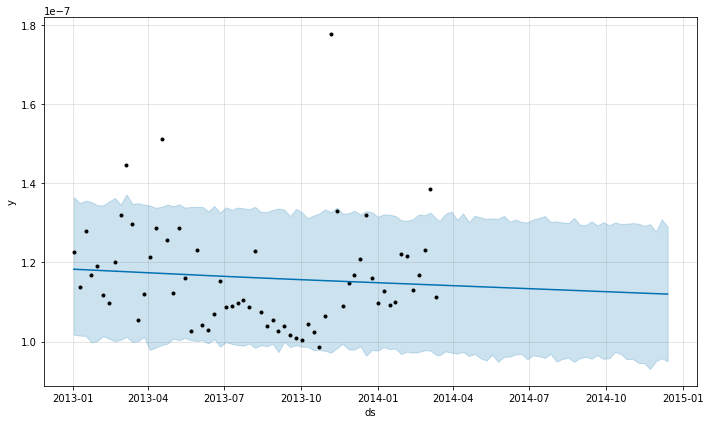

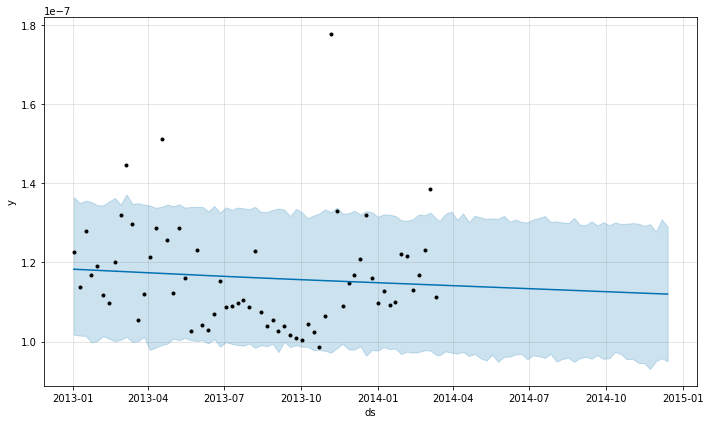

In [273]:
m.plot(forecast)

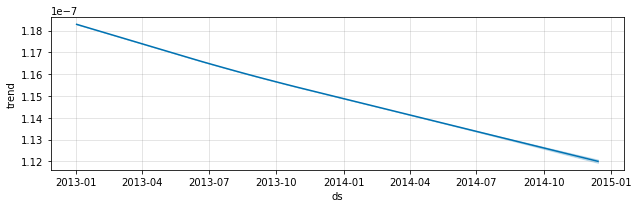

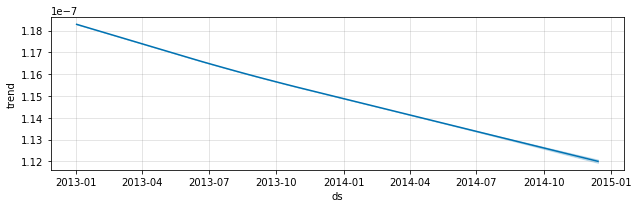

In [274]:
m.plot_components(forecast)

In [275]:
# nsmz forecast errors
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [287]:
forecast.ds = df.ds

In [290]:
# comparison df
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2014-11-19,1.122307e-07,9.456907e-08,1.292364e-07,1.131755e-07
2014-11-26,1.121726e-07,9.305557e-08,1.296738e-07,1.239669e-07
2014-12-03,1.121145e-07,9.503973e-08,1.278148e-07,1.260907e-07
2014-12-10,1.120565e-07,9.578945e-08,1.308604e-07,1.078846e-07
2014-12-17,1.119984e-07,9.502047e-08,1.290358e-07,1.382118e-07


In [291]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy() 
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']  
    predicted_part = df[-prediction_size:]  
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))   
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}


In [292]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 5.917084039110988
MAE 7.316683549733305e-09


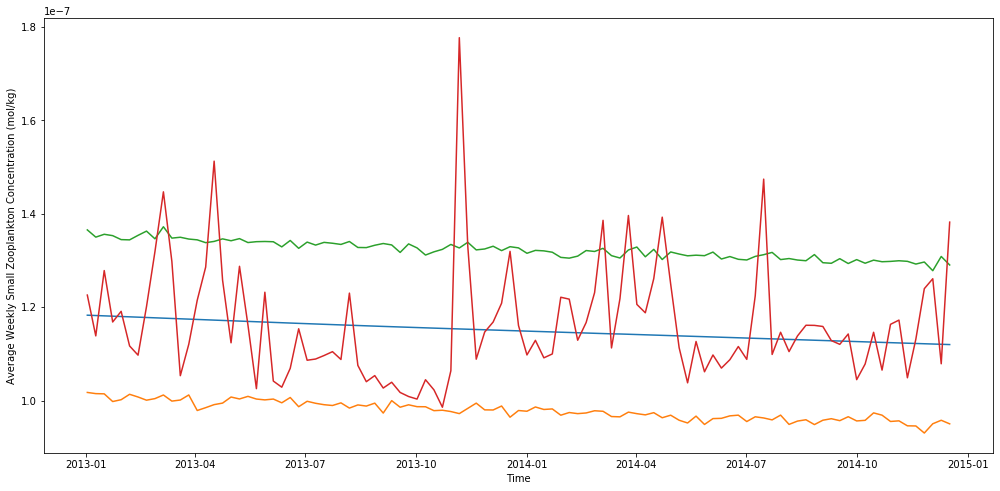

In [295]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly Small Zooplankton Concentration (mol/kg)')
plt.grid(False)
plt.show()

### nmdz

In [296]:
# Find the mean concentration of each week for each week over a period of 1 year
df=nmdz_df_2013[['date', 'concentration']]
df2=nmdz_df_2014[['date','concentration']]
all_frames = [df,df2]
df = pd.concat(all_frames, axis=0)

# Replace all negative values with NaNs
df=df.assign(concentration = df.concentration.where(df.concentration.ge(0)))

# Group by 7 day increments
df=df.groupby(np.arange(len(df.index))//141064).mean()

# Add list to df
df=df.assign(date=date)

# Classify date col as datetime object
df['date'] = pd.to_datetime(df['date'])

# Prophet requires the datetime col name = ds, the feature var = y
df.columns = ['y', 'ds']

# Holdout set: 40 weeks
prediction_size = 40
train_df = df[:-prediction_size]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(freq='W', periods=40)
forecast = m.predict(future)

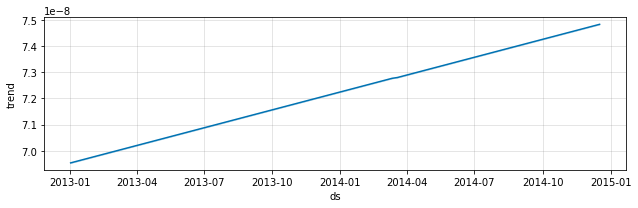

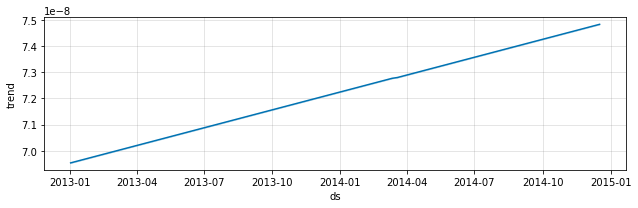

In [300]:
m.plot_components(forecast)

In [298]:
forecast.ds=df.ds

# comparison df
cmp_df = make_comparison_dataframe(df, forecast)

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 11.86048374267106
MAE 7.828383329044797e-09


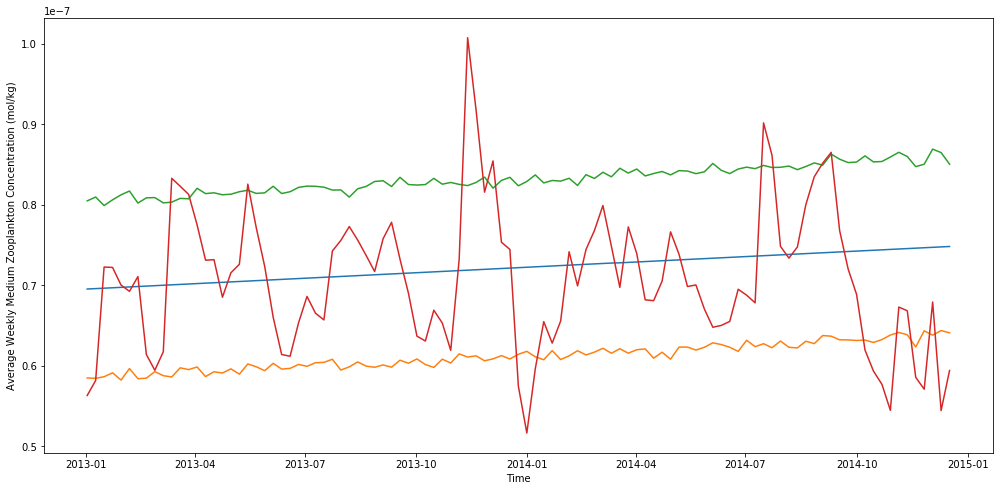

In [299]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly Medium Zooplankton Concentration (mol/kg)')
plt.grid(False)
plt.show()

### nlgz

In [301]:
# Find the mean concentration of each week for each week over a period of 1 year
df=nlgz_df_2013[['date', 'concentration']]
df2=nlgz_df_2014[['date','concentration']]
all_frames = [df,df2]
df = pd.concat(all_frames, axis=0)

# Replace all negative values with NaNs
df=df.assign(concentration = df.concentration.where(df.concentration.ge(0)))

# Group by 7 day increments
df=df.groupby(np.arange(len(df.index))//141064).mean()

# Add list to df
df=df.assign(date=date)

# Classify date col as datetime object
df['date'] = pd.to_datetime(df['date'])

# Prophet requires the datetime col name = ds, the feature var = y
df.columns = ['y', 'ds']

# Holdout set: 40 weeks
prediction_size = 40
train_df = df[:-prediction_size]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(freq='W', periods=40)
forecast = m.predict(future)

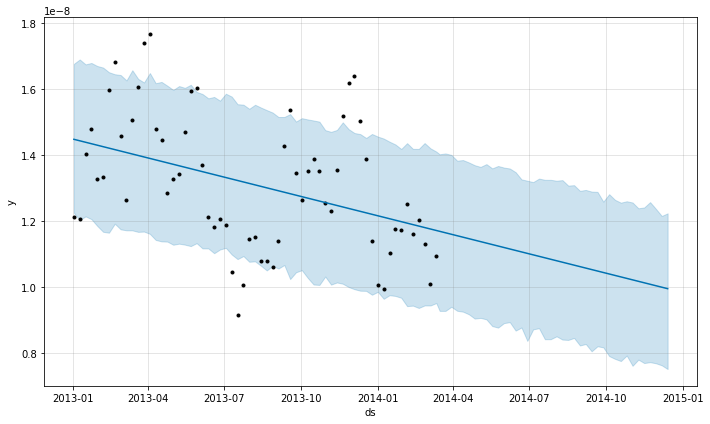

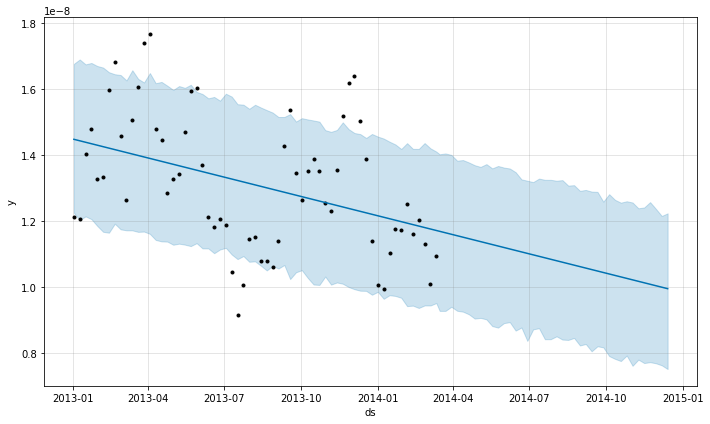

In [303]:
m.plot(forecast)

In [304]:
forecast.ds=df.ds

# comparison df
cmp_df = make_comparison_dataframe(df, forecast)

for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 32.05936765287975
MAE 5.884181600090222e-09


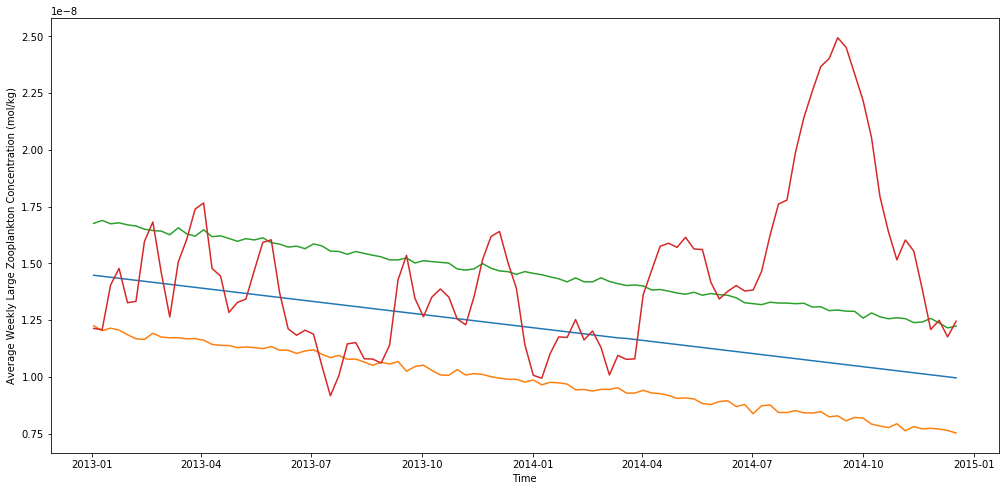

In [306]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly Large Zooplankton Concentration (mol/kg)')
plt.grid(False)
plt.show()

I extracted semi-daily average plankton concentrations (generated at 00:00 and 12:00) for two annual cycles of COBALT in Kaneohe Bay. For each zooplankton group, I trained my Prophet time series model with the first 15 months of data. I withheld the latter 3/4 of data from 2014 for validation purposes. I wanted to explore the differences between the predicted vs. "observed" (COBALT-generated) concentrations of each zooplankton group.

**Conclusions**:

- **nsmz (small zooplankton)**: MAPE = 5.9%. Concentrations generally fluctuate between 1.0 - 1.4e-7 mol/kg.

- **nmdz (medium zooplankton)**: MAPE = 11.9%. Concentrations fluctuate between 6.0 - 8.0e-8 mol/kg.

- **nlgz (large zooplankton)**: MAPE = 32.1%. Concentrations fluctuate between 1.25-1.75e-7 mol/kg until ~May 2014, when concentrations jump above the upper error bound and remain abnormally high until the start of the 2014 wet season in October.